In [6]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
alignment_rate_dir = "/Users/johnsolk/Documents/UCDavis/Whitehead/RNAseq_15killifish/evaluation/alignment_rates_comparison/"
alignment_rate_files = os.listdir(alignment_rate_dir)

In [8]:
alignment_rate_files

['STAR_genome_alignmentrates',
 'hisat2_genome_alignmentrate',
 'bwa_genome_alignmentrates',
 'bwa_transcriptome_alignmentrates',
 'salmon_Fhet_alignrates']

# salmon

In [9]:
salmon_file = alignment_rate_dir + "salmon_Fhet_alignrates"
salmon_data = pd.read_csv(salmon_file,sep=" ",header=None)
rate = salmon_data[[0,7]]
rate.columns = ['sample_info','perc_info']
rate['salmon_alignment_rate'] = rate.perc_info.str.split('%',n=1,expand=True)[0]
rate['sample'] = rate.sample_info.str.split("/",n=2,expand=True)[1]
df = rate[['sample','salmon_alignment_rate']]
df = df.drop_duplicates(subset='sample', keep='first', inplace=False)
df[['genus','species1','other1','other2']] = df['sample'].str.split('_',expand=True)
df["species"] = df["genus"] + "_" + df["species1"]
df = df[['sample','species','salmon_alignment_rate']]
df[['salmon_alignment_rate']] = df[['salmon_alignment_rate']].astype('float')

/Users/johnsolk/anaconda3/envs/jupyterpy3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/Users/johnsolk/anaconda3/envs/jupyterpy3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [205]:
arranged_x = ['F_heteroclitusMDPL','F_heteroclitusMDPP','F_grandis',
              'F_diaphanus','F_rathbuni','F_catanatus','F_similis',
              'F_notti','F_sciadicus','F_notatus','F_olivaceous',
              'F_chrysotus','A_xenica','F_zebrinus','F_parvapinis','L_parva','L_goodei']

In [11]:
df.species=pd.Categorical(df.species,categories=arranged_x)

In [220]:
df_salmon = df

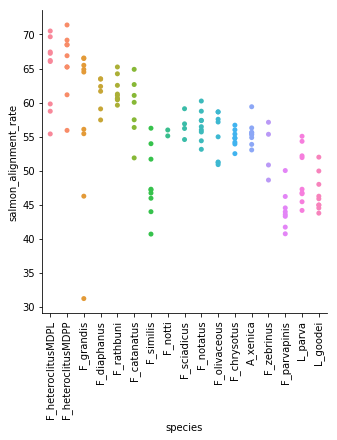

In [221]:
sns.catplot(x="species", y="salmon_alignment_rate", jitter=False, data=df_salmon);
plt.xticks(rotation=90);

In [13]:
df.head()

,sample,species,salmon_alignment_rate
0,F_catanatus_BW_2.quant,F_catanatus,61.0485
2,F_grandis_BW_1.quant,F_grandis,64.8640
4,F_parvapinis_BW_2.quant,F_parvapinis,44.5263
6,L_parva_FW_1.quant,L_parva,45.4292
8,F_diaphanus_BW_1.quant,F_diaphanus,59.0670


# hisat2

In [ ]:
# I know the files are labeled STAR, this was a typo in my script that named all my jobs with "STAR" prior to running on hpc

In [247]:
hisat2_file = alignment_rate_dir + "hisat2_genome_alignmentrate"
hisat2_data = pd.read_csv(hisat2_file,sep=" ",header=None)

In [248]:
hisat2_data.head()

,0,1,2,3
0,./star_F_rathbuni_FW_2-4703297.o:49.42%,overall,alignment,rate
1,./star_F_similis_FW_3-4703336.o:39.78%,overall,alignment,rate
2,./star_F_chrysotus_transfer_1-4703358.o:32.71%,overall,alignment,rate
3,./star_F_sciadicus_transfer_1-4703312.o:34.77%,overall,alignment,rate
4,./star_L_goodei_BW_1-4703309.o:29.74%,overall,alignment,rate


In [249]:
rate = hisat2_data[[0]]
rate.columns = ['sample_info']
rate['hisat2_alignment_rate'] = rate.sample_info.str.split(':',n=1,expand=True)[1]
rate['samples'] = rate.sample_info.str.split(":",n=1,expand=True)[0]

/Users/johnsolk/anaconda3/envs/jupyterpy3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/johnsolk/anaconda3/envs/jupyterpy3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [250]:
rate.head()

,sample_info,hisat2_alignment_rate,samples
0,./star_F_rathbuni_FW_2-4703297.o:49.42%,49.42%,./star_F_rathbuni_FW_2-4703297.o
1,./star_F_similis_FW_3-4703336.o:39.78%,39.78%,./star_F_similis_FW_3-4703336.o
2,./star_F_chrysotus_transfer_1-4703358.o:32.71%,32.71%,./star_F_chrysotus_transfer_1-4703358.o
3,./star_F_sciadicus_transfer_1-4703312.o:34.77%,34.77%,./star_F_sciadicus_transfer_1-4703312.o
4,./star_L_goodei_BW_1-4703309.o:29.74%,29.74%,./star_L_goodei_BW_1-4703309.o


In [251]:
rate['sample'] = rate.samples.str.split("/",n=2,expand=True)[1]

In [252]:
rate[['star','genus','species1','condition','other1']] = rate['sample'].str.split('_',expand=True)

In [253]:
rate["species"] = rate["genus"] + "_" + rate["species1"]

In [254]:
rate['replicate'] = rate['genus'] + "_" + rate['species1'] + "_" + rate['condition'] + "_" + rate['other1'].str.split("-",expand=True)[0]

In [255]:
rate['alignment_rate'] = rate['hisat2_alignment_rate'].str.split("%",expand=True)[0]

In [256]:
rate.head()

,sample_info,hisat2_alignment_rate,samples,sample,star,genus,species1,condition,other1,species,replicate,alignment_rate
0,./star_F_rathbuni_FW_2-4703297.o:49.42%,49.42%,./star_F_rathbuni_FW_2-4703297.o,star_F_rathbuni_FW_2-4703297.o,star,F,rathbuni,FW,2-4703297.o,F_rathbuni,F_rathbuni_FW_2,49.42
1,./star_F_similis_FW_3-4703336.o:39.78%,39.78%,./star_F_similis_FW_3-4703336.o,star_F_similis_FW_3-4703336.o,star,F,similis,FW,3-4703336.o,F_similis,F_similis_FW_3,39.78
2,./star_F_chrysotus_transfer_1-4703358.o:32.71%,32.71%,./star_F_chrysotus_transfer_1-4703358.o,star_F_chrysotus_transfer_1-4703358.o,star,F,chrysotus,transfer,1-4703358.o,F_chrysotus,F_chrysotus_transfer_1,32.71
3,./star_F_sciadicus_transfer_1-4703312.o:34.77%,34.77%,./star_F_sciadicus_transfer_1-4703312.o,star_F_sciadicus_transfer_1-4703312.o,star,F,sciadicus,transfer,1-4703312.o,F_sciadicus,F_sciadicus_transfer_1,34.77
4,./star_L_goodei_BW_1-4703309.o:29.74%,29.74%,./star_L_goodei_BW_1-4703309.o,star_L_goodei_BW_1-4703309.o,star,L,goodei,BW,1-4703309.o,L_goodei,L_goodei_BW_1,29.74


In [257]:
rate = rate[['replicate','species','alignment_rate']]

In [258]:
rate[['alignment_rate']] = rate[['alignment_rate']].astype('float')

In [259]:
rate.head()

,replicate,species,alignment_rate
0,F_rathbuni_FW_2,F_rathbuni,49.42
1,F_similis_FW_3,F_similis,39.78
2,F_chrysotus_transfer_1,F_chrysotus,32.71
3,F_sciadicus_transfer_1,F_sciadicus,34.77
4,L_goodei_BW_1,L_goodei,29.74


In [260]:
rate.species=pd.Categorical(rate.species,categories=arranged_x)

In [261]:
rate_hisat2 = rate

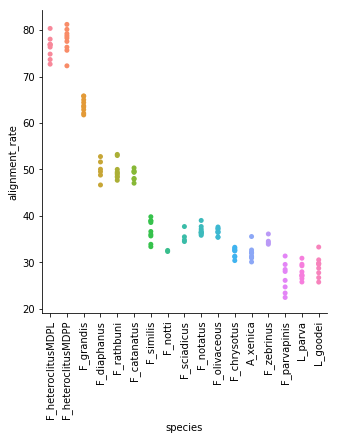

In [262]:
sns.catplot(x="species", y="alignment_rate", jitter=False, data=rate_hisat2);
plt.xticks(rotation=90);

# bwa mem genome

In [222]:
bwagenome_file = alignment_rate_dir + "bwa_genome_alignmentrates"
bwagenome_data = pd.read_csv(bwagenome_file,sep=" ",header=None)

In [223]:
bwagenome_data.head()

,0,1,2,3,4,5,6
0,./A_xenica_transfer_2.bam.stats:32867410,+,0,mapped,(91.47%,:,N/A)
1,./F_similis_transfer_1.bam.stats:28834179,+,0,mapped,(91.41%,:,N/A)
2,./F_grandis_FW_1.bam.stats:72079965,+,0,mapped,(95.84%,:,N/A)
3,./L_goodei_FW_1.bam.stats:43611079,+,0,mapped,(88.95%,:,N/A)
4,./F_notti_FW_1.bam.stats:22509999,+,0,mapped,(92.55%,:,N/A)


In [224]:
rate = bwagenome_data[[0,4]]
rate.columns = ['sample_info','perc_info']
rate['bwagenome_alignment_rate'] = rate.perc_info.str.split('(',n=1,expand=True)[1]
rate['samples'] = rate.sample_info.str.split("/",n=2,expand=True)[1]

/Users/johnsolk/anaconda3/envs/jupyterpy3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/johnsolk/anaconda3/envs/jupyterpy3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [225]:
rate.head()

,sample_info,perc_info,bwagenome_alignment_rate,samples
0,./A_xenica_transfer_2.bam.stats:32867410,(91.47%,91.47%,A_xenica_transfer_2.bam.stats:32867410
1,./F_similis_transfer_1.bam.stats:28834179,(91.41%,91.41%,F_similis_transfer_1.bam.stats:28834179
2,./F_grandis_FW_1.bam.stats:72079965,(95.84%,95.84%,F_grandis_FW_1.bam.stats:72079965
3,./L_goodei_FW_1.bam.stats:43611079,(88.95%,88.95%,L_goodei_FW_1.bam.stats:43611079
4,./F_notti_FW_1.bam.stats:22509999,(92.55%,92.55%,F_notti_FW_1.bam.stats:22509999


In [226]:
rate['replicate'] = rate.samples.str.split(".",n=2,expand=True)[0]

/Users/johnsolk/anaconda3/envs/jupyterpy3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [227]:
rate.head()

,sample_info,perc_info,bwagenome_alignment_rate,samples,replicate
0,./A_xenica_transfer_2.bam.stats:32867410,(91.47%,91.47%,A_xenica_transfer_2.bam.stats:32867410,A_xenica_transfer_2
1,./F_similis_transfer_1.bam.stats:28834179,(91.41%,91.41%,F_similis_transfer_1.bam.stats:28834179,F_similis_transfer_1
2,./F_grandis_FW_1.bam.stats:72079965,(95.84%,95.84%,F_grandis_FW_1.bam.stats:72079965,F_grandis_FW_1
3,./L_goodei_FW_1.bam.stats:43611079,(88.95%,88.95%,L_goodei_FW_1.bam.stats:43611079,L_goodei_FW_1
4,./F_notti_FW_1.bam.stats:22509999,(92.55%,92.55%,F_notti_FW_1.bam.stats:22509999,F_notti_FW_1


In [228]:
rate['species'] = rate.samples.str.split("_",n=4,expand=True)[0] + "_" + rate.samples.str.split("_",n=4,expand=True)[1] 

/Users/johnsolk/anaconda3/envs/jupyterpy3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [229]:
rate.head()

,sample_info,perc_info,bwagenome_alignment_rate,samples,replicate,species
0,./A_xenica_transfer_2.bam.stats:32867410,(91.47%,91.47%,A_xenica_transfer_2.bam.stats:32867410,A_xenica_transfer_2,A_xenica
1,./F_similis_transfer_1.bam.stats:28834179,(91.41%,91.41%,F_similis_transfer_1.bam.stats:28834179,F_similis_transfer_1,F_similis
2,./F_grandis_FW_1.bam.stats:72079965,(95.84%,95.84%,F_grandis_FW_1.bam.stats:72079965,F_grandis_FW_1,F_grandis
3,./L_goodei_FW_1.bam.stats:43611079,(88.95%,88.95%,L_goodei_FW_1.bam.stats:43611079,L_goodei_FW_1,L_goodei
4,./F_notti_FW_1.bam.stats:22509999,(92.55%,92.55%,F_notti_FW_1.bam.stats:22509999,F_notti_FW_1,F_notti


In [230]:
rate['bwa_mem_genome_alignment_rate'] = rate.bwagenome_alignment_rate.str.split("%",n=1,expand=True)[0].astype('float')

In [231]:
rate.head()

,sample_info,perc_info,bwagenome_alignment_rate,samples,replicate,species,bwa_mem_genome_alignment_rate
0,./A_xenica_transfer_2.bam.stats:32867410,(91.47%,91.47%,A_xenica_transfer_2.bam.stats:32867410,A_xenica_transfer_2,A_xenica,91.47
1,./F_similis_transfer_1.bam.stats:28834179,(91.41%,91.41%,F_similis_transfer_1.bam.stats:28834179,F_similis_transfer_1,F_similis,91.41
2,./F_grandis_FW_1.bam.stats:72079965,(95.84%,95.84%,F_grandis_FW_1.bam.stats:72079965,F_grandis_FW_1,F_grandis,95.84
3,./L_goodei_FW_1.bam.stats:43611079,(88.95%,88.95%,L_goodei_FW_1.bam.stats:43611079,L_goodei_FW_1,L_goodei,88.95
4,./F_notti_FW_1.bam.stats:22509999,(92.55%,92.55%,F_notti_FW_1.bam.stats:22509999,F_notti_FW_1,F_notti,92.55


In [232]:
rate = rate[['replicate','species','bwa_mem_genome_alignment_rate']]

In [233]:
rate.species=pd.Categorical(rate.species,categories=arranged_x)

In [234]:
rate_bwa_genome = rate

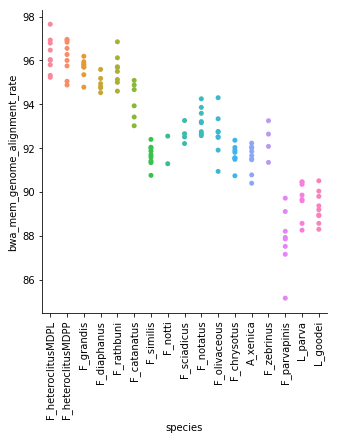

In [236]:
sns.catplot(x="species", y="bwa_mem_genome_alignment_rate", jitter=False, data=rate_bwa_genome);
plt.xticks(rotation=90);

# bwa mem transcriptome

In [237]:
bwatranscriptome_file = alignment_rate_dir + "bwa_transcriptome_alignmentrates"
bwatranscriptome_data = pd.read_csv(bwatranscriptome_file,sep=" ",header=None)

In [238]:
bwatranscriptome_data.head()

,0,1,2,3,4,5,6
0,./F_heteroclitusMDPP_FW_2.bam.stats:17276728,+,0,mapped,(79.62%,:,N/A)
1,./L_goodei_transfer_1.bam.stats:12515679,+,0,mapped,(67.06%,:,N/A)
2,./L_parva_FW_1.bam.stats:14748857,+,0,mapped,(68.33%,:,N/A)
3,./F_diaphanus_transfer_2.bam.stats:10328847,+,0,mapped,(79.00%,:,N/A)
4,./F_heteroclitusMDPP_FW_3.bam.stats:28713501,+,0,mapped,(82.35%,:,N/A)


In [239]:
rate = bwatranscriptome_data[[0,4]]
rate.columns = ['sample_info','perc_info']
rate['bwatranscriptome_alignment_rate'] = rate.perc_info.str.split('(',n=1,expand=True)[1]
rate['samples'] = rate.sample_info.str.split("/",n=2,expand=True)[1]

/Users/johnsolk/anaconda3/envs/jupyterpy3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/johnsolk/anaconda3/envs/jupyterpy3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [240]:
rate['replicate'] = rate.samples.str.split(".",n=2,expand=True)[0]

/Users/johnsolk/anaconda3/envs/jupyterpy3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [241]:
rate['species'] = rate.samples.str.split("_",n=4,expand=True)[0] + "_" + rate.samples.str.split("_",n=4,expand=True)[1] 

/Users/johnsolk/anaconda3/envs/jupyterpy3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [242]:
rate['bwa_mem_transcriptome_alignment_rate'] = rate.bwatranscriptome_alignment_rate.str.split("%",n=1,expand=True)[0].astype('float')

In [243]:
rate = rate[['replicate','species','bwa_mem_transcriptome_alignment_rate']]

In [244]:
rate.species=pd.Categorical(rate.species,categories=arranged_x)

In [245]:
rate_bwa_transcriptome = rate

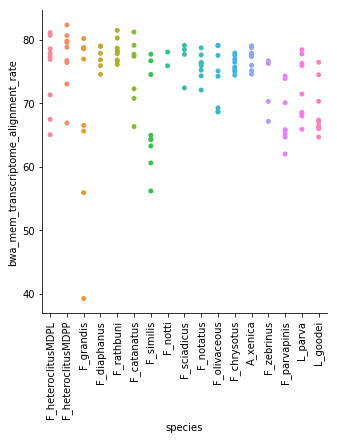

In [246]:
sns.catplot(x="species", y="bwa_mem_transcriptome_alignment_rate", jitter=False, data=rate_bwa_transcriptome);
plt.xticks(rotation=90);

# STAR

In [263]:
star_file = alignment_rate_dir + "STAR_genome_alignmentrates"
star_data = pd.read_csv(star_file,sep="\t",header=None)

In [264]:
star_data.head()

,0,1
0,./F_notatus_transfer_1Log.final.out: ...,59.60%
1,./F_chrysotus_BW_3Log.final.out: ...,57.87%
2,./F_heteroclitusMDPL_FW_2Log.final.out: ...,82.16%
3,./F_grandis_FW_2Log.final.out: ...,76.34%
4,./A_xenica_transfer_2Log.final.out: ...,55.62%


In [265]:
rate = star_data
rate.columns = ['sample_info','perc_info']
rate['STAR_genome_alignment_rate'] = rate.perc_info.str.split('%',n=1,expand=True)[0].astype('float')

In [266]:
rate['samples'] = rate.sample_info.str.split("/",n=2,expand=True)[1]

In [267]:
rate.head()

,sample_info,perc_info,STAR_genome_alignment_rate,samples
0,./F_notatus_transfer_1Log.final.out: ...,59.60%,59.60,F_notatus_transfer_1Log.final.out: ...
1,./F_chrysotus_BW_3Log.final.out: ...,57.87%,57.87,F_chrysotus_BW_3Log.final.out: ...
2,./F_heteroclitusMDPL_FW_2Log.final.out: ...,82.16%,82.16,F_heteroclitusMDPL_FW_2Log.final.out: ...
3,./F_grandis_FW_2Log.final.out: ...,76.34%,76.34,F_grandis_FW_2Log.final.out: ...
4,./A_xenica_transfer_2Log.final.out: ...,55.62%,55.62,A_xenica_transfer_2Log.final.out: ...


In [268]:
rate['species'] = rate.samples.str.split("_",n=4,expand=True)[0] + "_" + rate.samples.str.split("_",n=4,expand=True)[1]

In [269]:
rate['replicate_info'] = rate.samples.str.split("_",n=4,expand=True)[3]

In [270]:
rate['replicate'] = rate.samples.str.split("_",n=4,expand=True)[0] + "_" + rate.samples.str.split("_",n=4,expand=True)[1] + "_" + rate.samples.str.split("_",n=4,expand=True)[2] + "_" + rate.replicate_info.str.split("Log",n=1,expand=True)[0]


In [271]:
rate.head()

,sample_info,perc_info,STAR_genome_alignment_rate,samples,species,replicate_info,replicate
0,./F_notatus_transfer_1Log.final.out: ...,59.60%,59.60,F_notatus_transfer_1Log.final.out: ...,F_notatus,1Log.final.out: Uniquel...,F_notatus_transfer_1
1,./F_chrysotus_BW_3Log.final.out: ...,57.87%,57.87,F_chrysotus_BW_3Log.final.out: ...,F_chrysotus,3Log.final.out: Uniquel...,F_chrysotus_BW_3
2,./F_heteroclitusMDPL_FW_2Log.final.out: ...,82.16%,82.16,F_heteroclitusMDPL_FW_2Log.final.out: ...,F_heteroclitusMDPL,2Log.final.out: Uniquel...,F_heteroclitusMDPL_FW_2
3,./F_grandis_FW_2Log.final.out: ...,76.34%,76.34,F_grandis_FW_2Log.final.out: ...,F_grandis,2Log.final.out: Uniquel...,F_grandis_FW_2
4,./A_xenica_transfer_2Log.final.out: ...,55.62%,55.62,A_xenica_transfer_2Log.final.out: ...,A_xenica,2Log.final.out: Uniquel...,A_xenica_transfer_2


In [272]:
rate = rate[['replicate','species','STAR_genome_alignment_rate']]

In [273]:
rate.head()

,replicate,species,STAR_genome_alignment_rate
0,F_notatus_transfer_1,F_notatus,59.60
1,F_chrysotus_BW_3,F_chrysotus,57.87
2,F_heteroclitusMDPL_FW_2,F_heteroclitusMDPL,82.16
3,F_grandis_FW_2,F_grandis,76.34
4,A_xenica_transfer_2,A_xenica,55.62


In [274]:
rate.species=pd.Categorical(rate.species,categories=arranged_x)

In [275]:
rate_star = rate

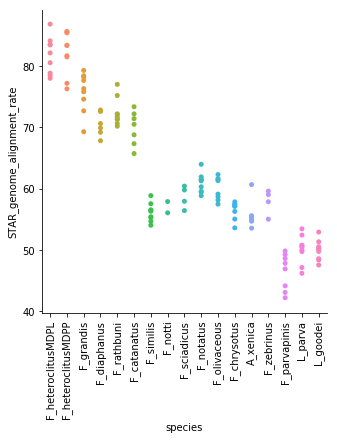

In [277]:
sns.catplot(x="species", y="STAR_genome_alignment_rate", jitter=False, data=rate_star);
plt.xticks(rotation=90);

# 5 alignment methods together

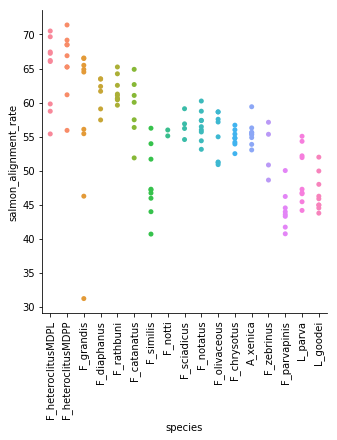

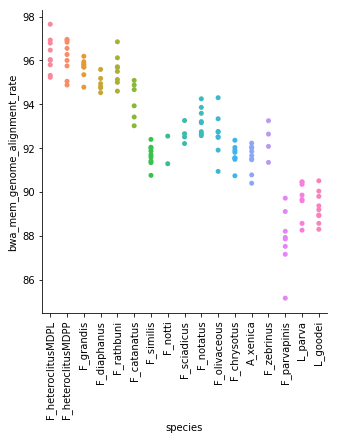

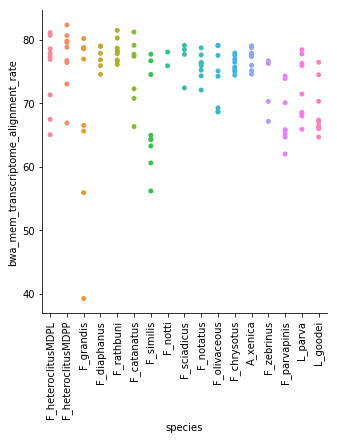

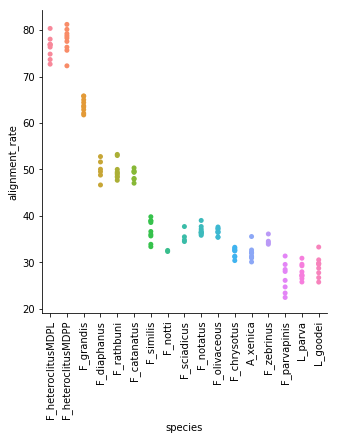

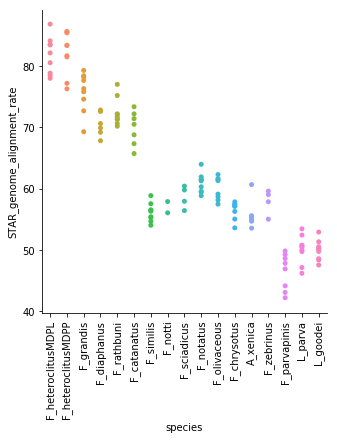

In [281]:
sns.catplot(x="species", y="salmon_alignment_rate", jitter=False, data=df_salmon);
plt.xticks(rotation=90);
sns.catplot(x="species", y="bwa_mem_genome_alignment_rate", jitter=False, data=rate_bwa_genome);
plt.xticks(rotation=90);
sns.catplot(x="species", y="bwa_mem_transcriptome_alignment_rate", jitter=False, data=rate_bwa_transcriptome);
plt.xticks(rotation=90);
sns.catplot(x="species", y="alignment_rate", jitter=False, data=rate_hisat2);
plt.xticks(rotation=90);
sns.catplot(x="species", y="STAR_genome_alignment_rate", jitter=False, data=rate_star);
plt.xticks(rotation=90);